In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import io
import zipfile

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)

def read_zip_df(zip_path: str | Path, sep: str = "\t") -> pd.DataFrame:
    zip_path = Path(zip_path)
    with zipfile.ZipFile(zip_path) as zf:
        name = zf.namelist()[0]
        with zf.open(name) as fh:
            df = pd.read_csv(io.TextIOWrapper(fh, encoding="utf-8"), sep=sep)
    return df

In [2]:
# PATH = "gbif_manual/2441454.zip"
# zip_path = Path(PATH)

# df = read_zip_df(zip_path)
# check_nan = df.isnull().sum()
# print(check_nan)
# # df.info
# # df.columns
# df.head(2)

Index(['kingdom', 'kingdomkey', 'phylum', 'phylumkey', 'class', 'classkey',
       'order', 'orderkey', 'family', 'familykey', 'genus', 'genuskey',
       'species', 'specieskey', 'yearmonthday', 'eeacellcode', 'kingdomcount',
       'phylumcount', 'classcount', 'ordercount', 'familycount', 'genuscount',
       'occurrences', 'mintemporaluncertainty',
       'mincoordinateuncertaintyinmeters'],
      dtype='object')
kingdom                               0
kingdomkey                            0
phylum                                0
phylumkey                             0
class                                 0
classkey                              0
order                                 0
orderkey                              0
family                                0
familykey                             0
genus                                 0
genuskey                              0
species                               0
specieskey                            0
yearmonthday        

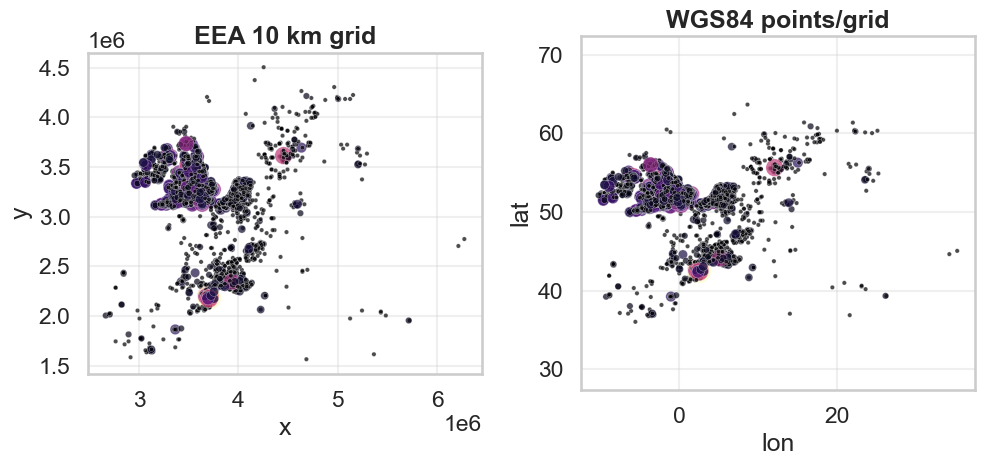

/Users/azd/Desktop/github_projects/gbif-data/venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) Arial.
  func(*args, **kwargs)
/Users/azd/Desktop/github_projects/gbif-data/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8239 (\N{NARROW NO-BREAK SPACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


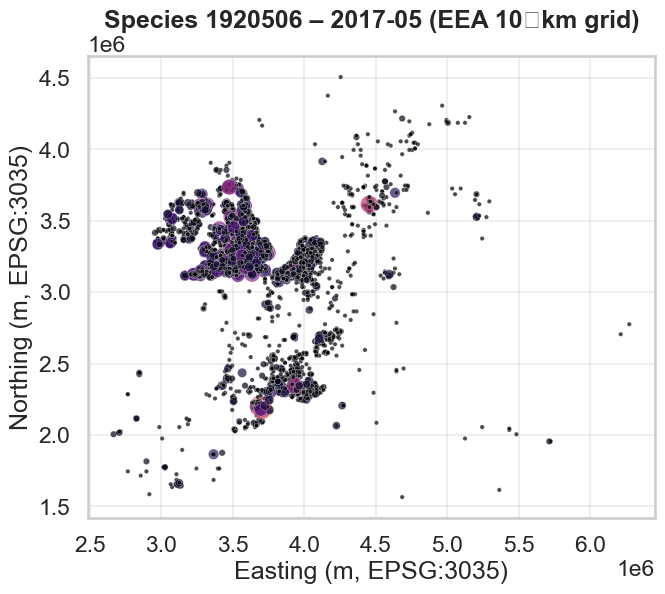

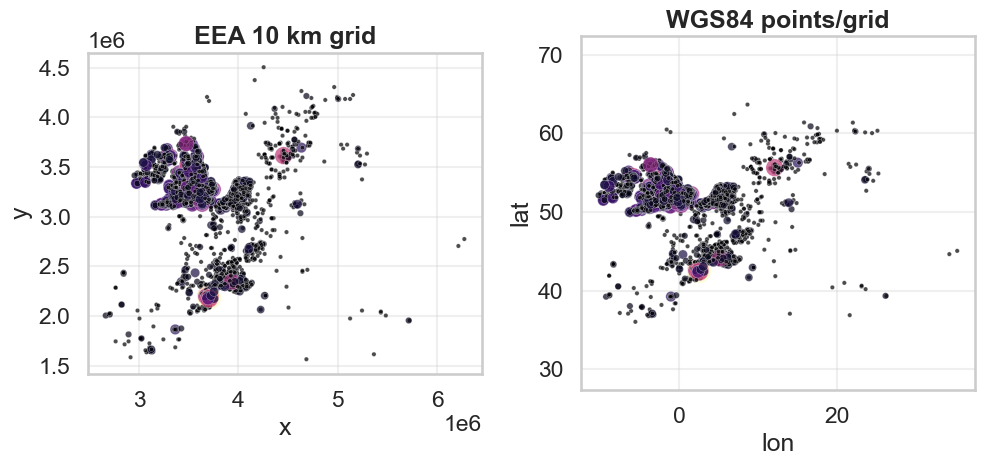

In [ ]:
import pandas as pd
from plot_with_coordinates import plot_eea_monthly, plot_time_series, plot_grid_comparison, plot_grid_comparison_1, eea_to_wgs_grid, eea_to_wgs_points

# PATH = "gbif_manual/1920506.zip" # missing eeacols? TODO check
# TODO Change the numbers before the zip to the below calls so you can see the same species
PATH = "gbif_manual/1920506.zip"
zip_path = Path(PATH)

df_raw = read_zip_df(zip_path)
print(df_raw.columns)
check_nan = df_raw.isnull().sum()
print(check_nan)

fig = plot_eea_monthly(df_raw, species_key=1920506, year=2017, month=5)
fig2 = plot_time_series(df_raw, species_key=1920506, freq="M")
df_wgs  = eea_to_wgs_points(df_raw)

plot_grid_comparison(df_raw, df_wgs, species_key=1920506, year=2017, month=5)


In [4]:
from plot_with_coordinates import eea_to_wgs_points

def test_eea_to_wgs_points():
    data = {"specieskey":[1], "yearmonthday":["2000-05-16"],
            "eeacellcode":["10kmE395N243"], "occurrences":[5]}
    df = pd.DataFrame(data)
    out = eea_to_wgs_points(df)
    assert np.isfinite(out["lon"].iloc[0]), "lon not numeric"
    assert np.isfinite(out["lat"].iloc[0]), "lat not numeric"
    print("eea_to_wgs_points OK ->", out.iloc[0][["lon","lat"]].to_numpy())


test_eea_to_wgs_points()

eea_to_wgs_points OK -> [ 5.36900935 44.92443606]
